In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mmdp import mqlearning
import argparse
from grid_city import GridWorld
ROOT = '/home/jikunkang/Git/MMDP/'

[[0.         0.33333299 0.5        0.         0.66666698 0.66666698]
 [0.71428603 0.66666698 0.25       0.285714   0.         0.27272701]
 [0.33333299 0.66666698 0.         0.25       0.66666698 0.83333302]
 [0.5        0.         0.66666698 0.42857099 0.33333299 0.5       ]
 [0.33333299 0.33333299 0.5        0.         0.5        0.5       ]
 [0.5        0.25       0.42307699 0.5        0.33333299 0.25      ]]
RUNS:0
Episode:0, reward-2938
Episode:10, reward-4744
Episode:20, reward-2360
Episode:30, reward-3958
Episode:40, reward-4835
Episode:50, reward-1272
Episode:60, reward-3298
Episode:70, reward-8040
Episode:80, reward-5419
Episode:90, reward-7110
RUNS:1
Episode:0, reward-6465
Episode:10, reward-7948
Episode:20, reward-6837
Episode:30, reward-4529
Episode:40, reward-3946
Episode:50, reward-6795
Episode:60, reward-10152
Episode:70, reward-3325
Episode:80, reward-5140
Episode:90, reward-4133
RUNS:2
Episode:0, reward-3768
Episode:10, reward-6643
Episode:20, reward-5374
Episode:30, re

Episode:50, reward-4160
Episode:60, reward-4169
Episode:70, reward-4610
Episode:80, reward-4903
Episode:90, reward-8939
RUNS:32
Episode:0, reward-14503
Episode:10, reward-5497
Episode:20, reward-2531
Episode:30, reward-6588
Episode:40, reward-12189
Episode:50, reward-1420
Episode:60, reward-6526
Episode:70, reward-4702
Episode:80, reward-4349
Episode:90, reward-4901
RUNS:33
Episode:0, reward-8348
Episode:10, reward-9050
Episode:20, reward-4043
Episode:30, reward-2214
Episode:40, reward-7496
Episode:50, reward-4477
Episode:60, reward-4005
Episode:70, reward-2897
Episode:80, reward-1515
Episode:90, reward-5486
RUNS:34
Episode:0, reward-2752
Episode:10, reward-4676
Episode:20, reward-3120
Episode:30, reward-9563
Episode:40, reward-4260
Episode:50, reward-6115
Episode:60, reward-5429
Episode:70, reward-7474
Episode:80, reward-6243
Episode:90, reward-4087
RUNS:35
Episode:0, reward-6827
Episode:10, reward-7771
Episode:20, reward-4805
Episode:30, reward-3547
Episode:40, reward-8831
Episode:50

No handles with labels found to put in legend.


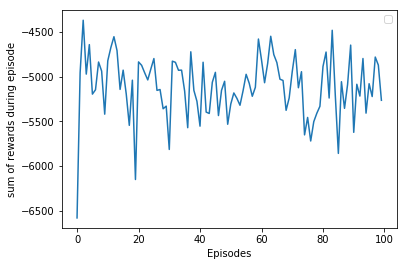

In [5]:
import sys
sys.argv=['']; del sys
parser = argparse.ArgumentParser(description='Multi-agent DDPG')
# add argument
parser.add_argument('--grid_size', default=6, type=int, help='the size of a grid world')
parser.add_argument('--n_actions', default=5, type=int, help='total number of actions an agent can take')
parser.add_argument('--filename', default=ROOT+'/data/pr.txt', type=str, help='Pick-up probability file')
parser.add_argument('--n_agents', default=2, type=int, help='the number of agent play in the environment')
parser.add_argument('--runs', default=50, type=int, help='the number of times run the game')

# parser args
args = parser.parse_args()
env = GridWorld(args=args, terminal_time=1000, reward_stay=-1, reward_hitwall=-20, reward_move=-1, reward_pick=1)
rewards, q_value = mqlearning(args=args, env=env, episode_len=100, runs=args.runs)
rewards /= args.runs
plt.figure(1)
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('sum of rewards during episode')
plt.legend()
plt.show()

In [3]:
y = np.zeros((6, 6)).reshape(-1,1)
for i in range(len(q_value[:, 0])):
    y[i] = np.argmax(q_value[i,:])
y.reshape(6,6)

array([[2., 3., 3., 2., 3., 3.],
       [0., 3., 3., 2., 1., 2.],
       [1., 3., 3., 3., 3., 3.],
       [1., 1., 1., 3., 3., 3.],
       [1., 1., 2., 3., 1., 1.],
       [0., 1., 4., 4., 1., 3.]])

In [4]:
z = []
for i in range(6):
    z.append([])
    for j in range(6):
        y = np.argmax(q_value[i*6+j, :])
        if y == 0:
            z[-1].append('STAY')
        elif y == 1:
            z[-1].append(' UP ')
        elif y == 2:
            z[-1].append('DOWN')
        elif y == 3:
            z[-1].append('LEFT')
        elif y == 4:
            z[-1].append('RIGT')
for row in z:
    print(row)

['DOWN', 'LEFT', 'LEFT', 'DOWN', 'LEFT', 'LEFT']
['STAY', 'LEFT', 'LEFT', 'DOWN', ' UP ', 'DOWN']
[' UP ', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT']
[' UP ', ' UP ', ' UP ', 'LEFT', 'LEFT', 'LEFT']
[' UP ', ' UP ', 'DOWN', 'LEFT', ' UP ', ' UP ']
['STAY', ' UP ', 'RIGT', 'RIGT', ' UP ', 'LEFT']
